# **Problem 1**:::..
## You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [20]:
#importing necessary libraries

import numpy as np   
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style

%matplotlib inline 

import nltk
import random
import string
import scipy.cluster.hierarchy as sch

from numpy import where
from IPython.display import Image
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE 
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer

from gensim.models import Word2Vec

import warnings
warnings.filterwarnings("ignore")

### 1.1. Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [21]:
#loading data
edf = pd.read_excel('Election_Data.xlsx', sheet_name= 'Election_Dataset_Two Classes')

#### Performing EDA

In [22]:
edf.head(2)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male


In [23]:
edf.tail(2)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [24]:
edf.shape

(1525, 10)

In [25]:
print("no. of rows: ",edf.shape[0], "\n""no. of columns: ",edf.shape[1])

no. of rows:  1525 
no. of columns:  10


- Unnamed column is unnecessary for further analysis. It can be dropped.

In [26]:
edf.drop(['Unnamed: 0'], axis=1, inplace=True)

In [27]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [531]:
edf.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

- No Null values found

In [532]:
edf['gender'].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [533]:
edf['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [534]:
dup = edf.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

edf[dup]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35.0,4.0,4.0,5.0,2.0,3.0,2.0,male
626,Labour,39.0,3.0,4.0,4.0,2.0,5.0,2.0,male
870,Labour,38.0,2.0,4.0,2.0,2.0,4.0,3.0,male
983,Conservative,74.0,4.0,3.0,2.0,4.0,8.0,2.0,female
1154,Conservative,53.0,3.0,4.0,2.0,2.0,6.0,0.0,female
1236,Labour,36.0,3.0,3.0,2.0,2.0,6.0,2.0,female
1244,Labour,29.0,4.0,4.0,4.0,2.0,2.0,2.0,female
1438,Labour,40.0,4.0,3.0,4.0,2.0,2.0,2.0,male


In [535]:
edf.describe().round().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.0,16.0,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.0,1.0,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.0,1.0,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.0,1.0,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,3.0,1.0,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,7.0,3.0,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,2.0,1.0,0.0,0.0,2.0,2.0,3.0


In [536]:
edf.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

_______________________________________________________________________________________________________________________________

### 1.2. Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers. Interpret the inferences for each . Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

#### UniVariate Analysis

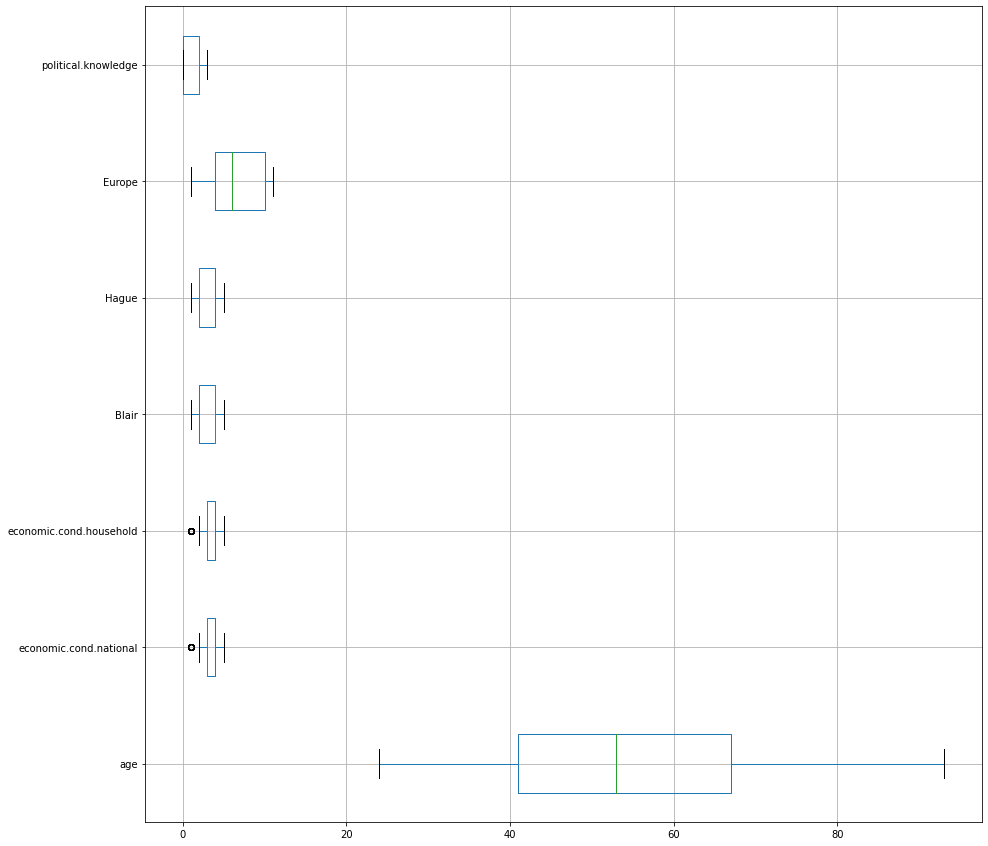

In [12]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
edf.boxplot(vert = 0)
plt.show()

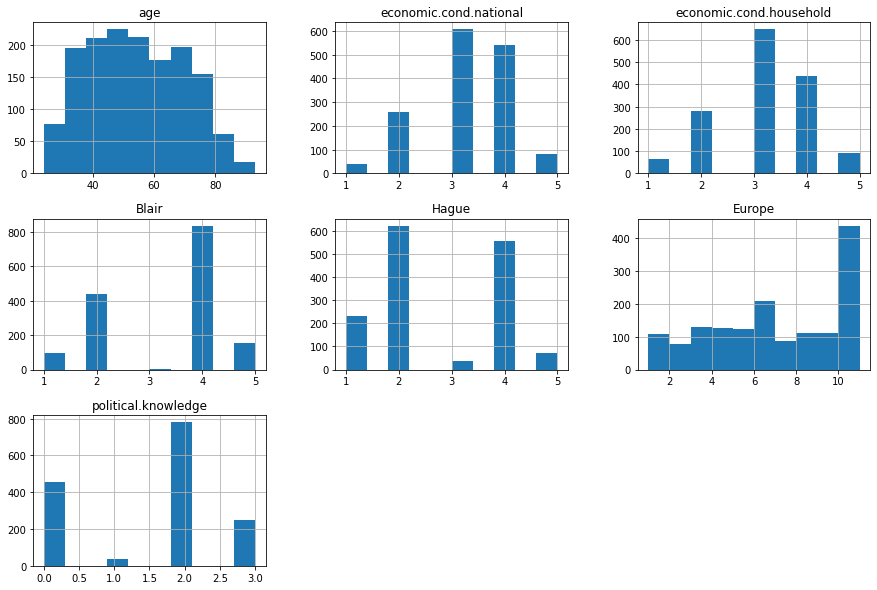

In [444]:
edf.hist(figsize=(15,10));

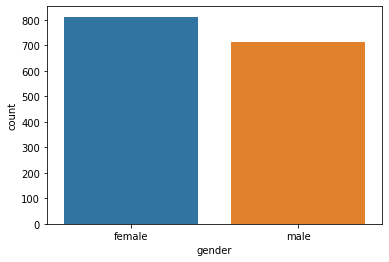

In [495]:
sns.countplot(x ='gender', data = edf);

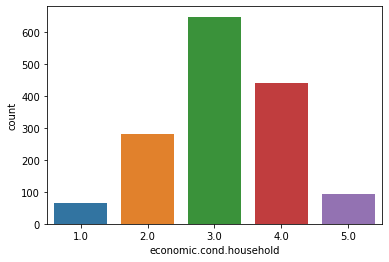

In [457]:
sns.countplot(x ='economic.cond.household', data = edf);

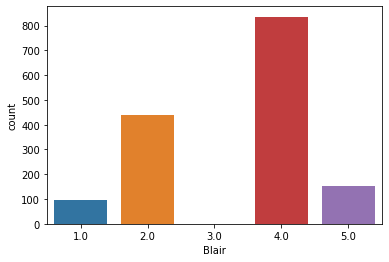

In [459]:
sns.countplot(x ='Blair', data = edf);

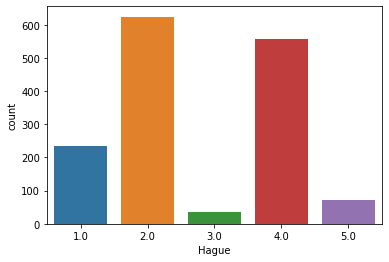

In [460]:
sns.countplot(x ='Hague', data = edf);

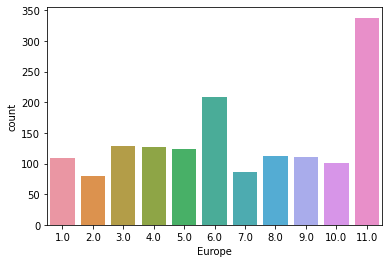

In [461]:
sns.countplot(x ='Europe', data = edf);

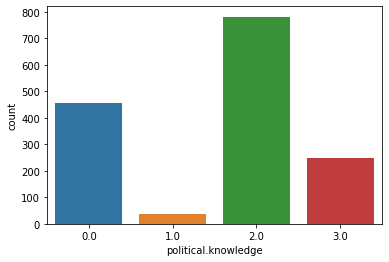

In [462]:
sns.countplot(x ='political.knowledge', data = edf);

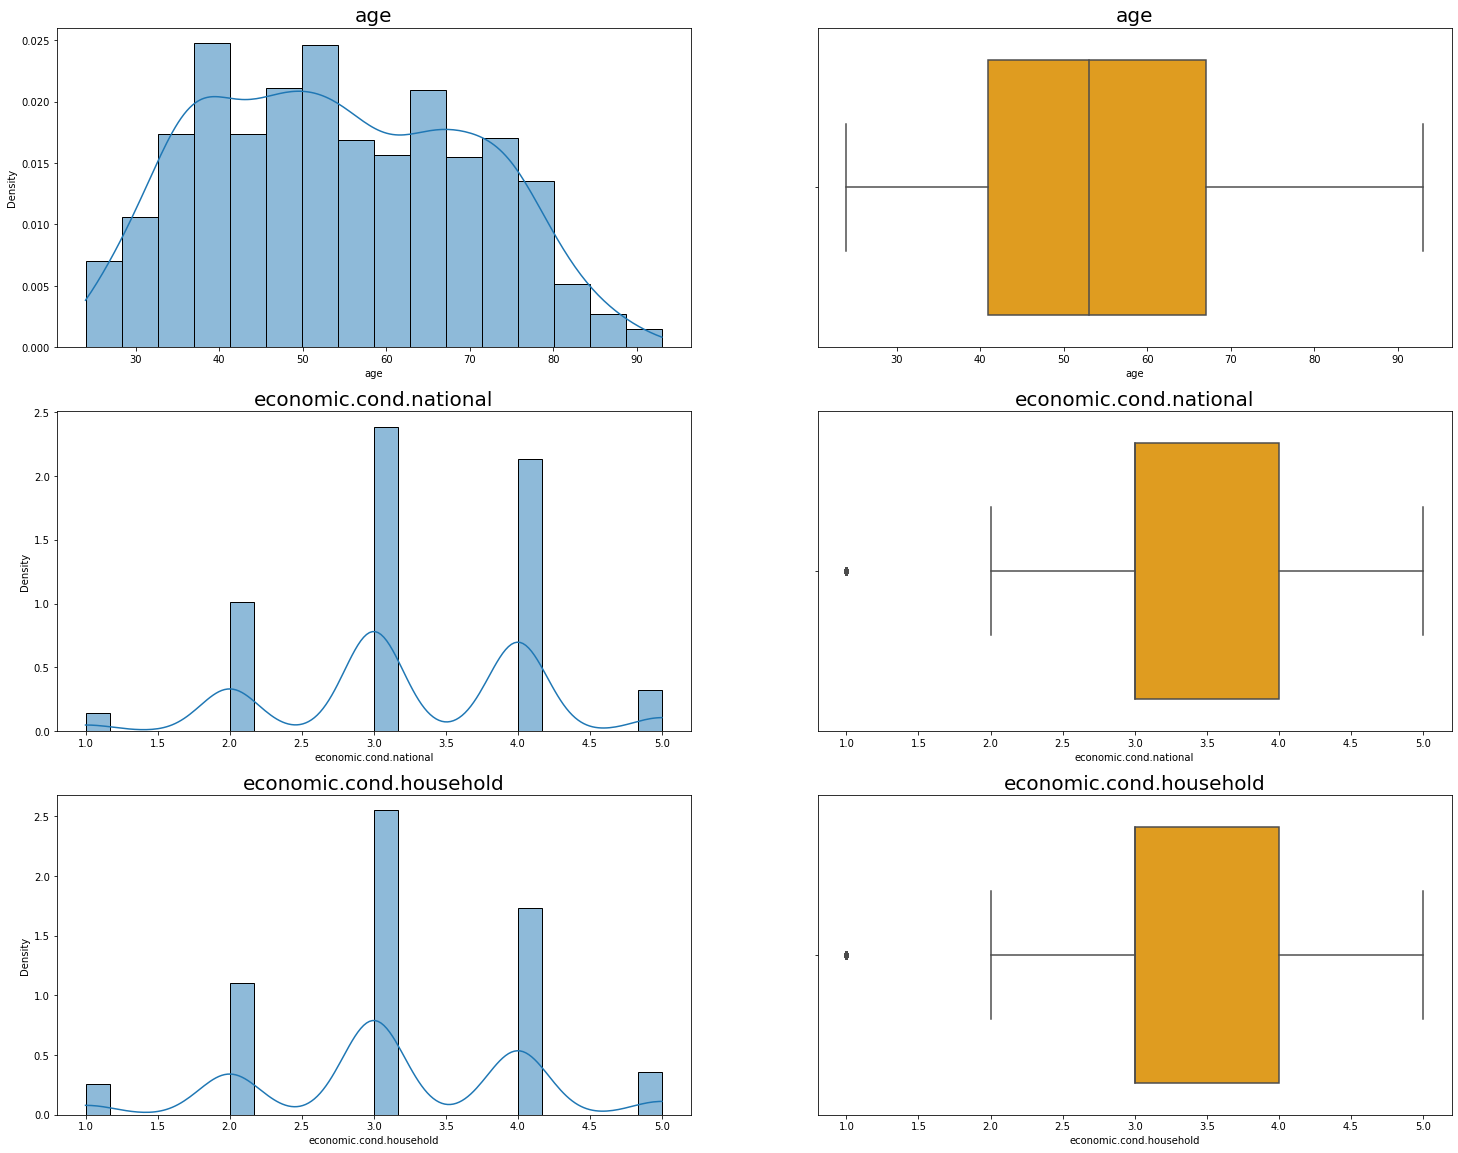

In [13]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(25,20)
a = sns.histplot( data=edf, x='age', kde= True, stat = 'density', ax=axes[0][0])
a.set_title('age',fontsize=20)
a = sns.boxplot(data=edf, x='age',color='orange' , ax=axes[0][1])
a.set_title('age',fontsize=20)

a = sns.histplot(data=edf, x='economic.cond.national', kde= True, stat = 'density', ax=axes[1][0])
a.set_title('economic.cond.national',fontsize=20)
a = sns.boxplot(data=edf, x='economic.cond.national',color='orange' , ax=axes[1][1])
a.set_title('economic.cond.national',fontsize=20)

a = sns.histplot(data=edf, x='economic.cond.household', kde= True, stat = 'density', ax=axes[2][0])
a.set_title('economic.cond.household',fontsize=20)
a = sns.boxplot(data=edf, x='economic.cond.household', color='orange', ax=axes[2][1])
a.set_title('economic.cond.household',fontsize=20)

plt.show();

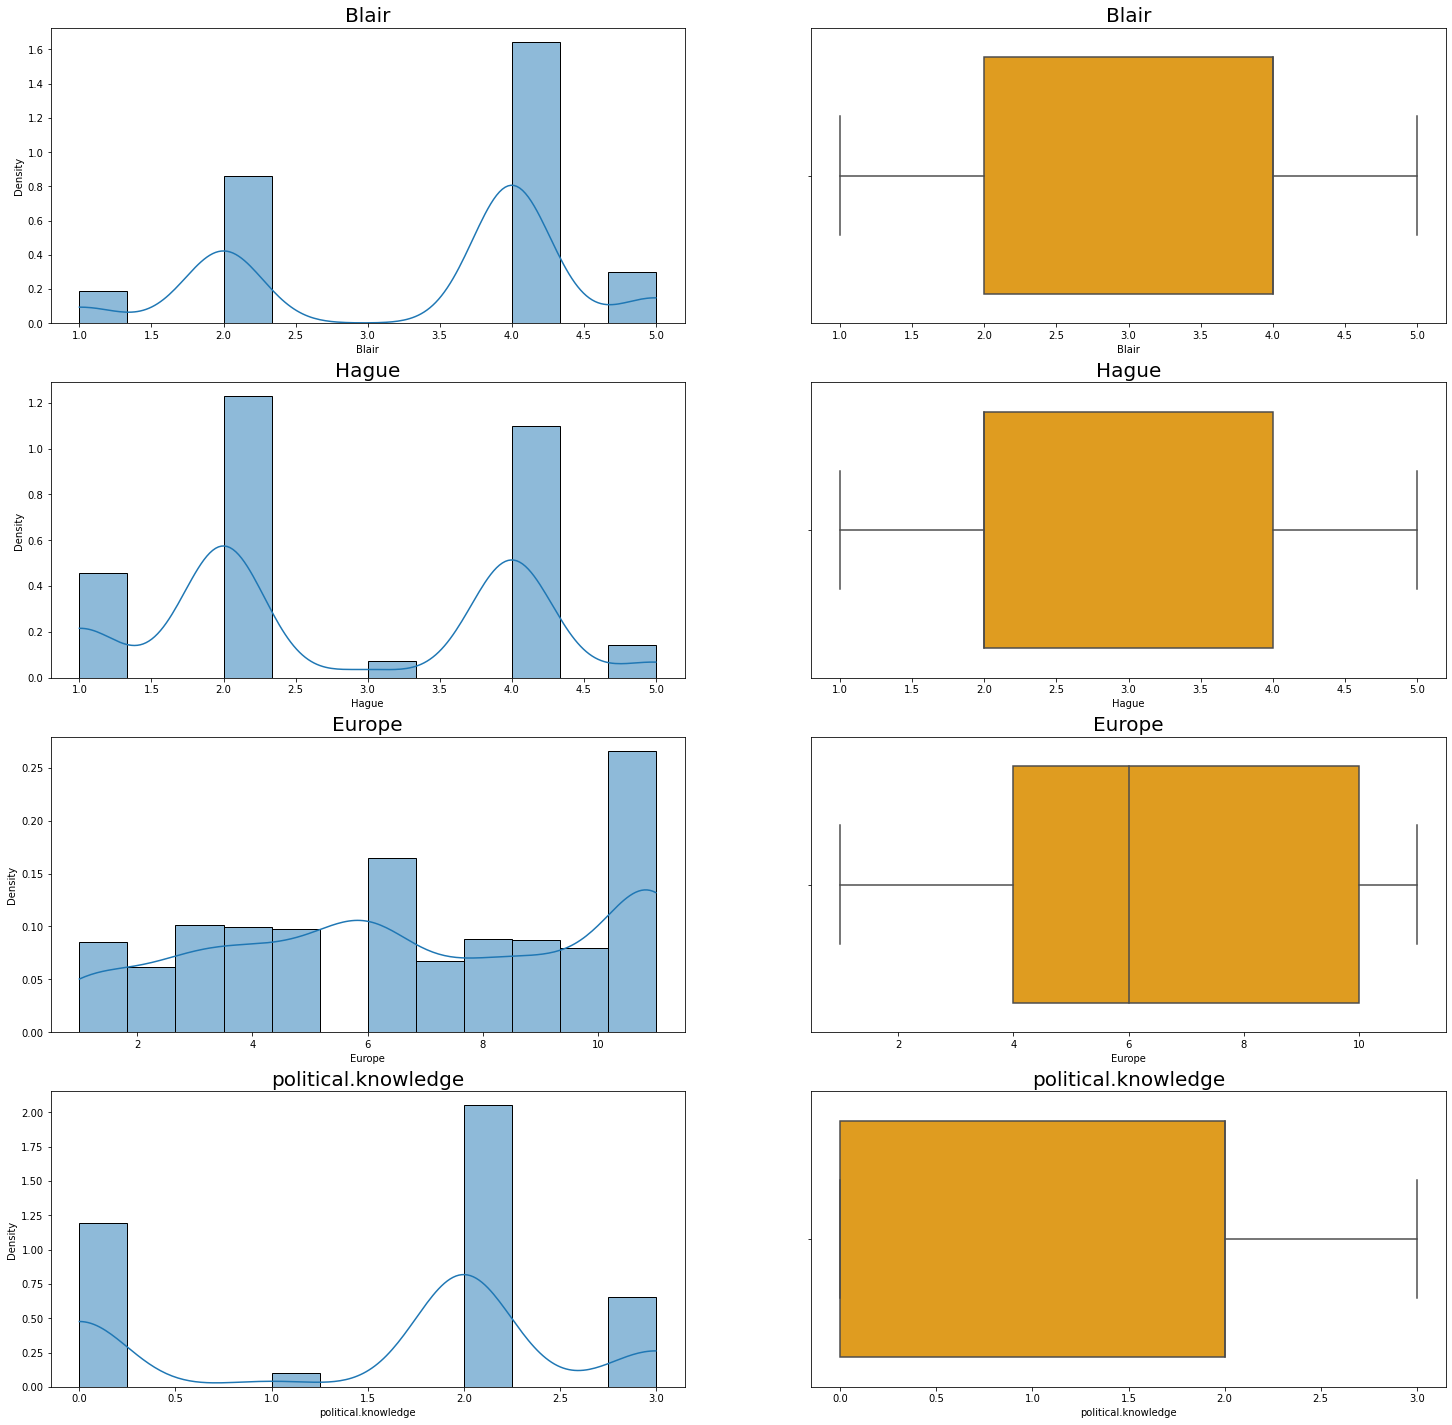

In [392]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(25,25)
a = sns.histplot(data=edf, x='Blair', kde= True, stat = 'density', ax=axes[0][0])
a.set_title('Blair',fontsize=20)
a = sns.boxplot(data=edf, x='Blair', color='orange', ax=axes[0][1])
a.set_title('Blair',fontsize=20)

a = sns.histplot(data=edf, x='Hague', kde= True, stat = 'density', ax=axes[1][0])
a.set_title('Hague',fontsize=20)
a = sns.boxplot(data=edf, x='Hague', color='orange', ax=axes[1][1])
a.set_title('Hague',fontsize=20)\

a = sns.histplot(data=edf, x='Europe', kde= True, stat = 'density', ax=axes[2][0])
a.set_title('Europe',fontsize=20)
a = sns.boxplot(data=edf, x='Europe', color='orange', ax=axes[2][1])
a.set_title('Europe',fontsize=20)

a = sns.histplot(data=edf, x='political.knowledge', kde= True, stat = 'density', ax=axes[3][0])
a.set_title('political.knowledge',fontsize=20)
a = sns.boxplot(data=edf, x='political.knowledge', color='orange', ax=axes[3][1])
a.set_title('political.knowledge',fontsize=20)

plt.show();

_______________________________________________________________________________________________________________________________

#### Distribution Plot

In [4]:
cat=[]
num=[]
for i in edf.columns:
    if edf[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


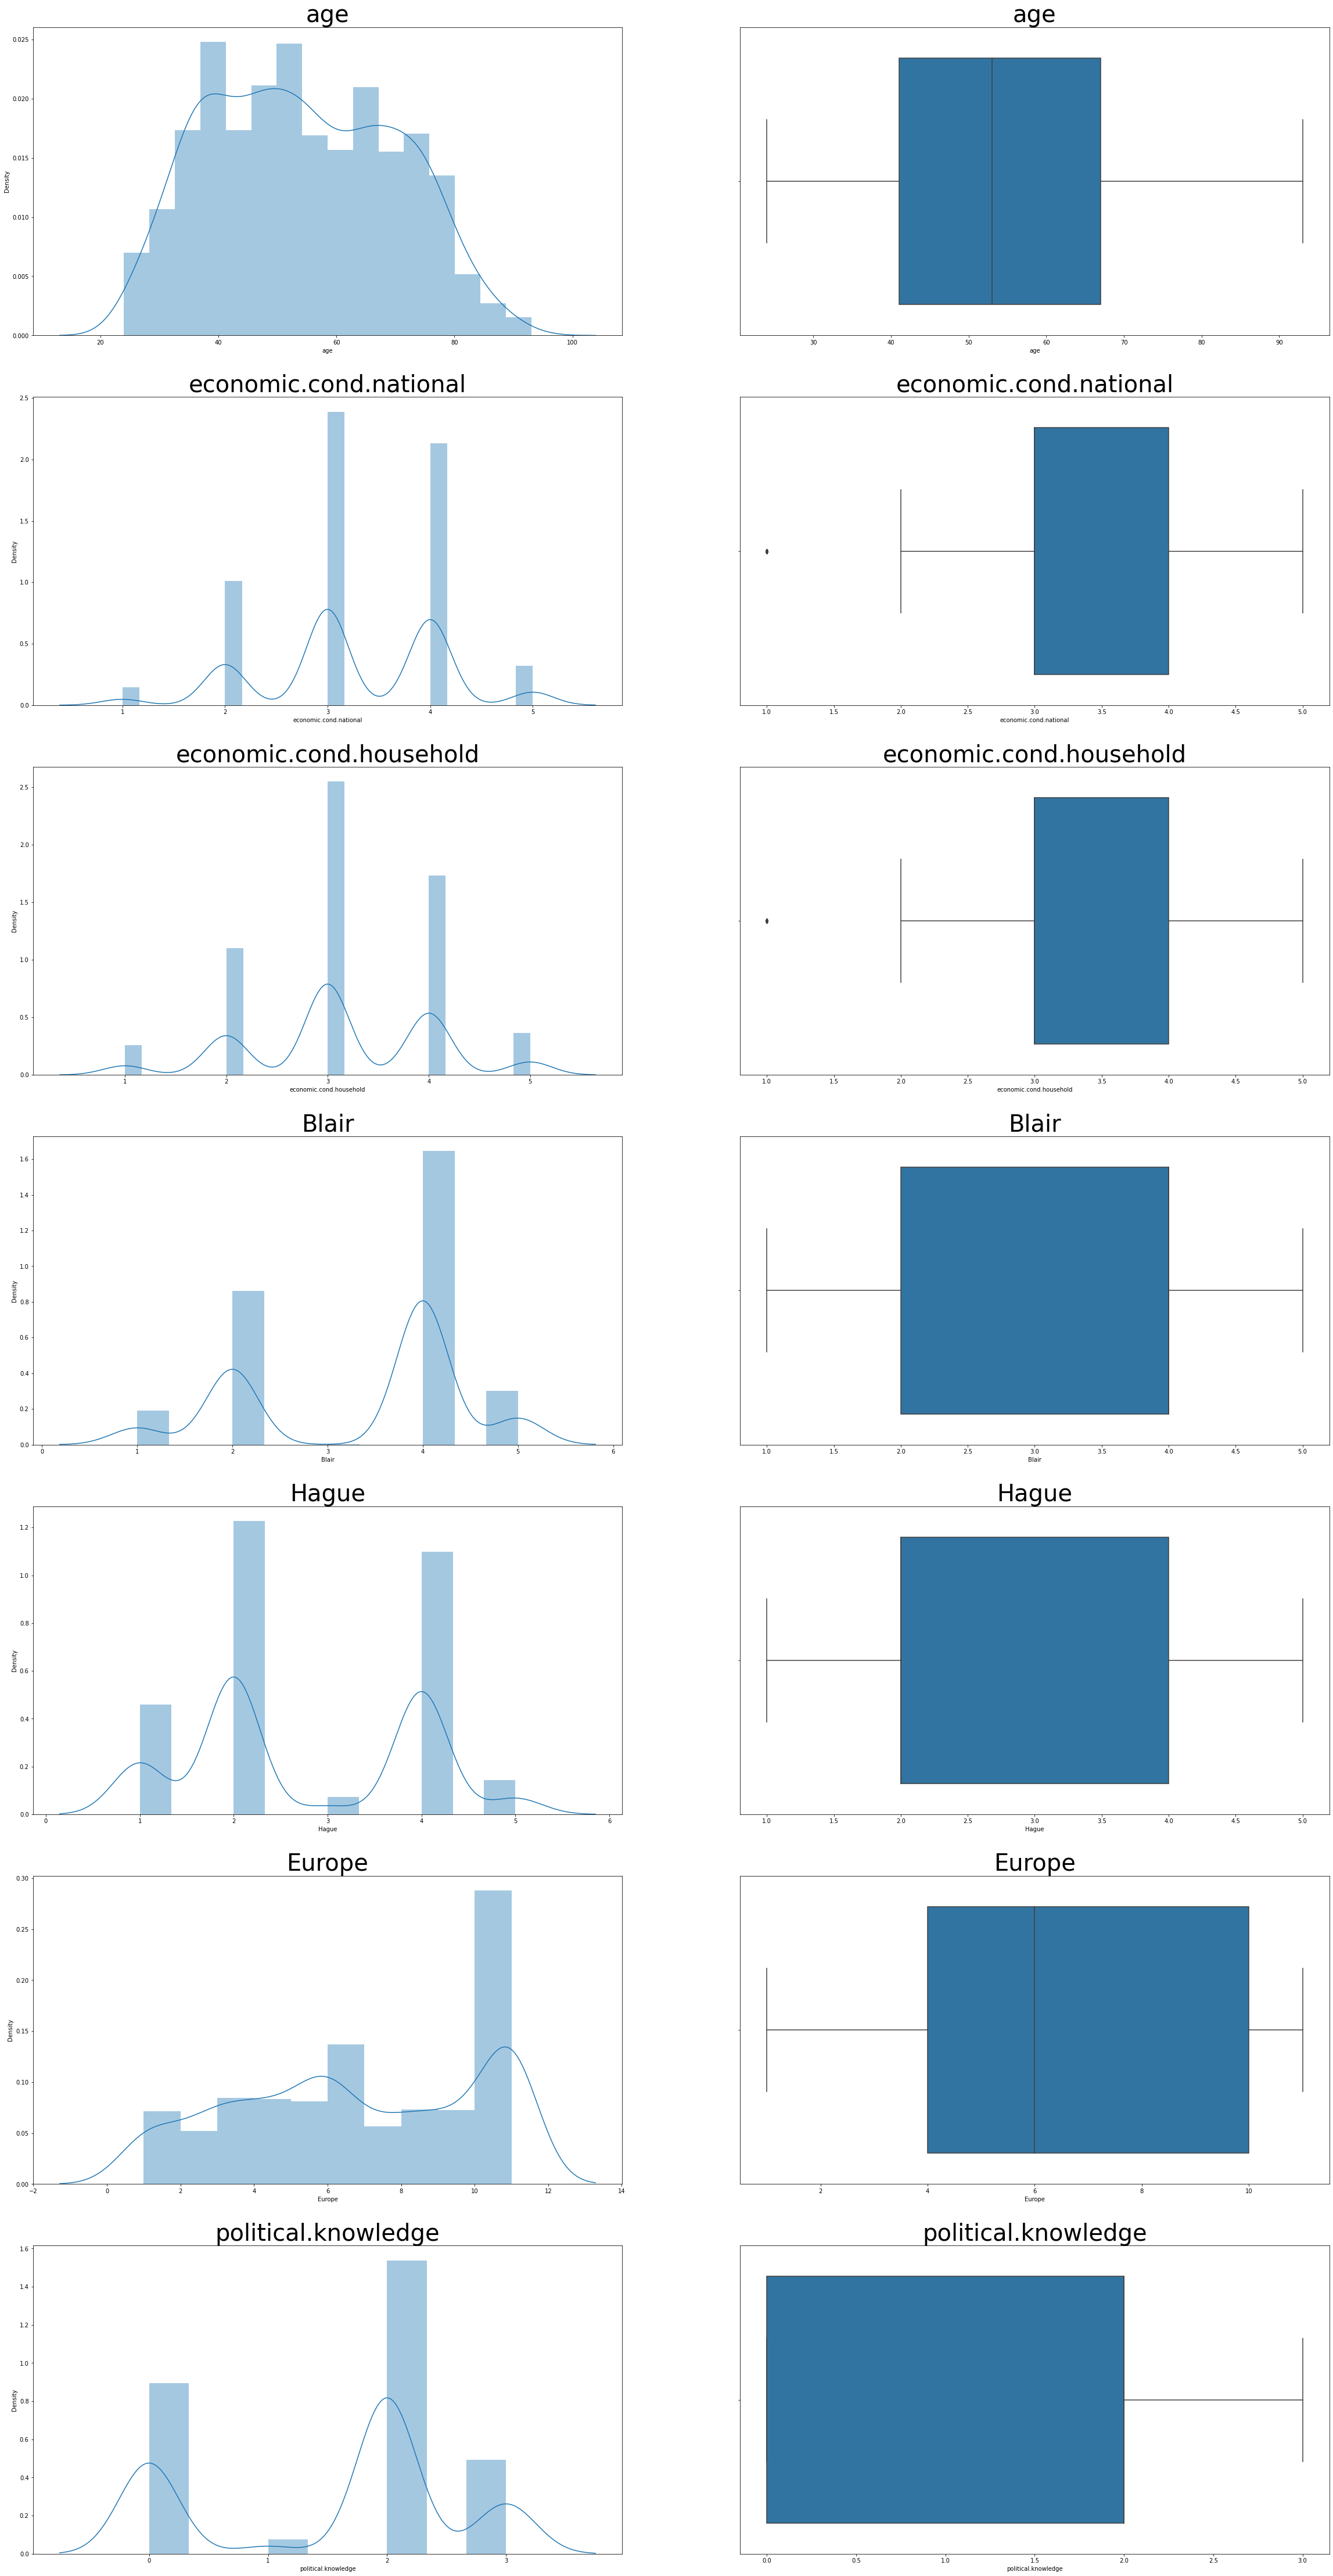

In [5]:
fig, axes = plt.subplots(nrows=7,ncols=2,figsize=(40,80))
for i,j in zip(num,axes):
    a=sns.distplot(edf[i],ax=j[0])
    a.set_title(i,fontsize=40)
    a = sns.boxplot(edf[i],ax=j[1])
    a.set_title(i,fontsize=40)

_______________________________________________________________________________________________________________________________

###  Bivariate and Multivariate Analysis

In [494]:
edf.value_counts(["vote", "gender"])

vote          gender
Labour        female    553
              male      510
Conservative  female    259
              male      203
dtype: int64

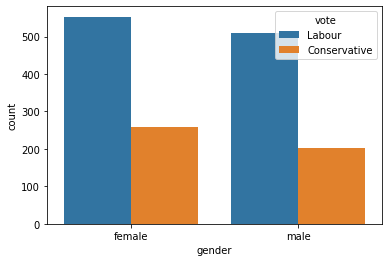

In [502]:
sns.countplot(x ='gender', hue = 'vote',data = edf);

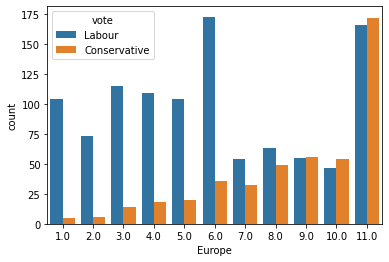

In [503]:
sns.countplot(x ='Europe', hue = 'vote',data = edf);

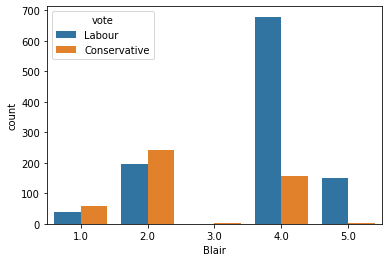

In [504]:
sns.countplot(x ='Blair', hue = 'vote',data = edf);

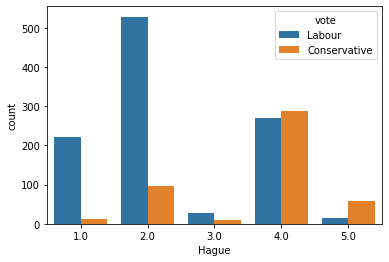

In [505]:
sns.countplot(x ='Hague', hue = 'vote',data = edf);

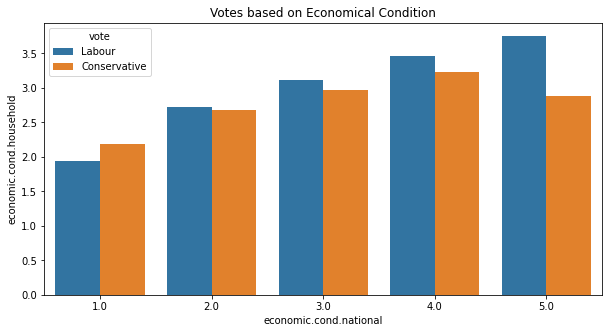

In [484]:
plt.figure(figsize=(10,5))
sns.barplot(data = edf, x= 'economic.cond.national', y ='economic.cond.household', hue = 'vote', ci = None)
plt.title('Votes based on Economical Condition');

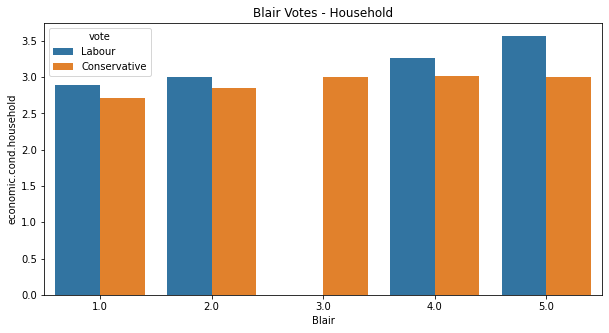

In [486]:
plt.figure(figsize=(10,5))
sns.barplot(data = edf, x= 'Blair', y ='economic.cond.household', hue = 'vote', ci = None)
plt.title('Blair Votes - Household');

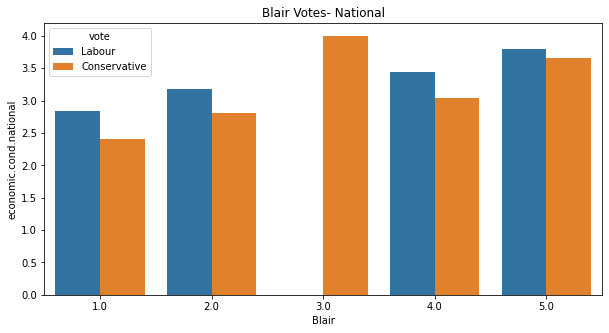

In [487]:
plt.figure(figsize=(10,5))
sns.barplot(data = edf, x= 'Blair', y ='economic.cond.national', hue = 'vote', ci = None)
plt.title('Blair Votes- National');

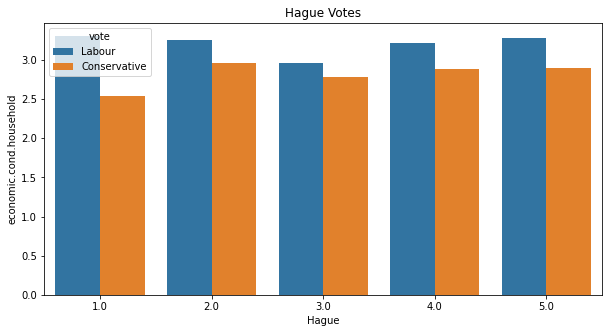

In [490]:
plt.figure(figsize=(10,5))
sns.barplot(data = edf, x= 'Hague', y ='economic.cond.household', hue = 'vote', ci = None)
plt.title('Hague Votes');

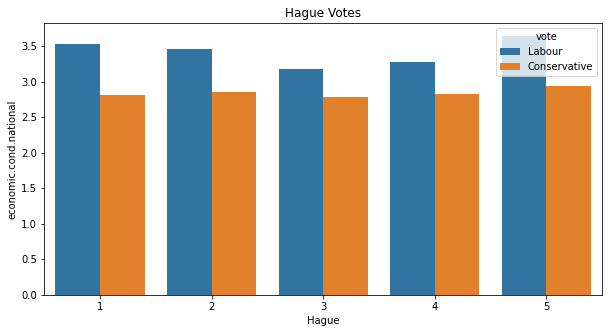

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(data = edf, x= 'Hague', y ='economic.cond.national', hue = 'vote', ci = None)
plt.title('Hague Votes');

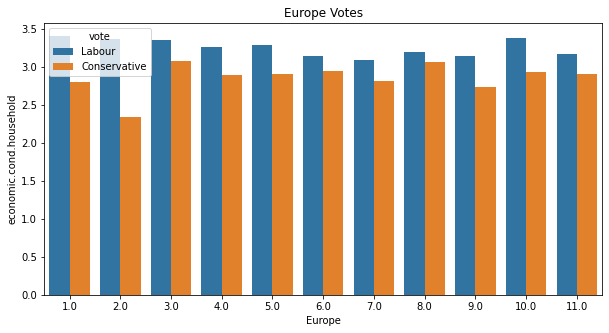

In [491]:
plt.figure(figsize=(10,5))
sns.barplot(data = edf, x= 'Europe', y ='economic.cond.household', hue = 'vote', ci = None)
plt.title('Europe Votes');

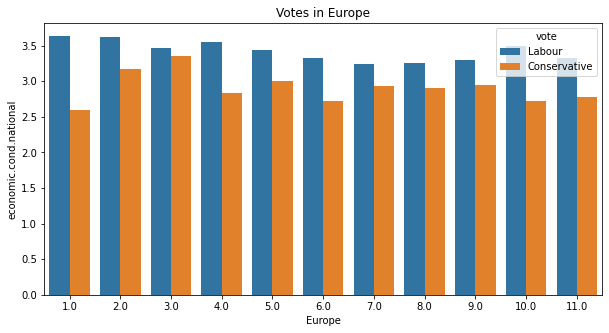

In [479]:
plt.figure(figsize=(10,5))
sns.barplot(data = edf, x= 'Europe', y ='economic.cond.national', hue = 'vote', ci = None)
plt.title('Votes in Europe');

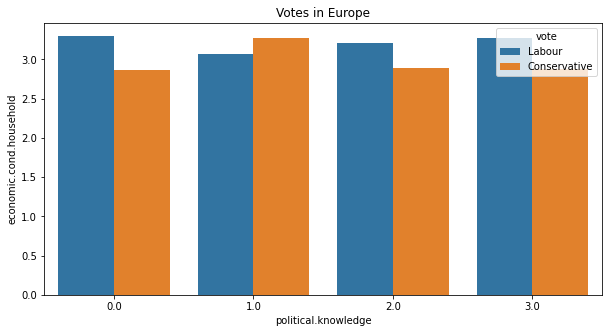

In [507]:
plt.figure(figsize=(10,5))
sns.barplot(data = edf, x= 'political.knowledge', y ='economic.cond.household', hue = 'vote', ci = None)
plt.title('Votes in Europe');

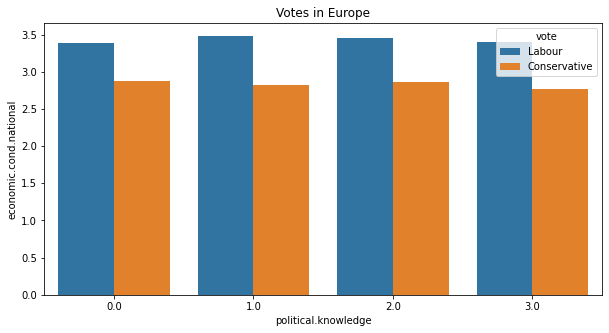

In [506]:
plt.figure(figsize=(10,5))
sns.barplot(data = edf, x= 'political.knowledge', y ='economic.cond.national', hue = 'vote', ci = None)
plt.title('Votes in Europe');

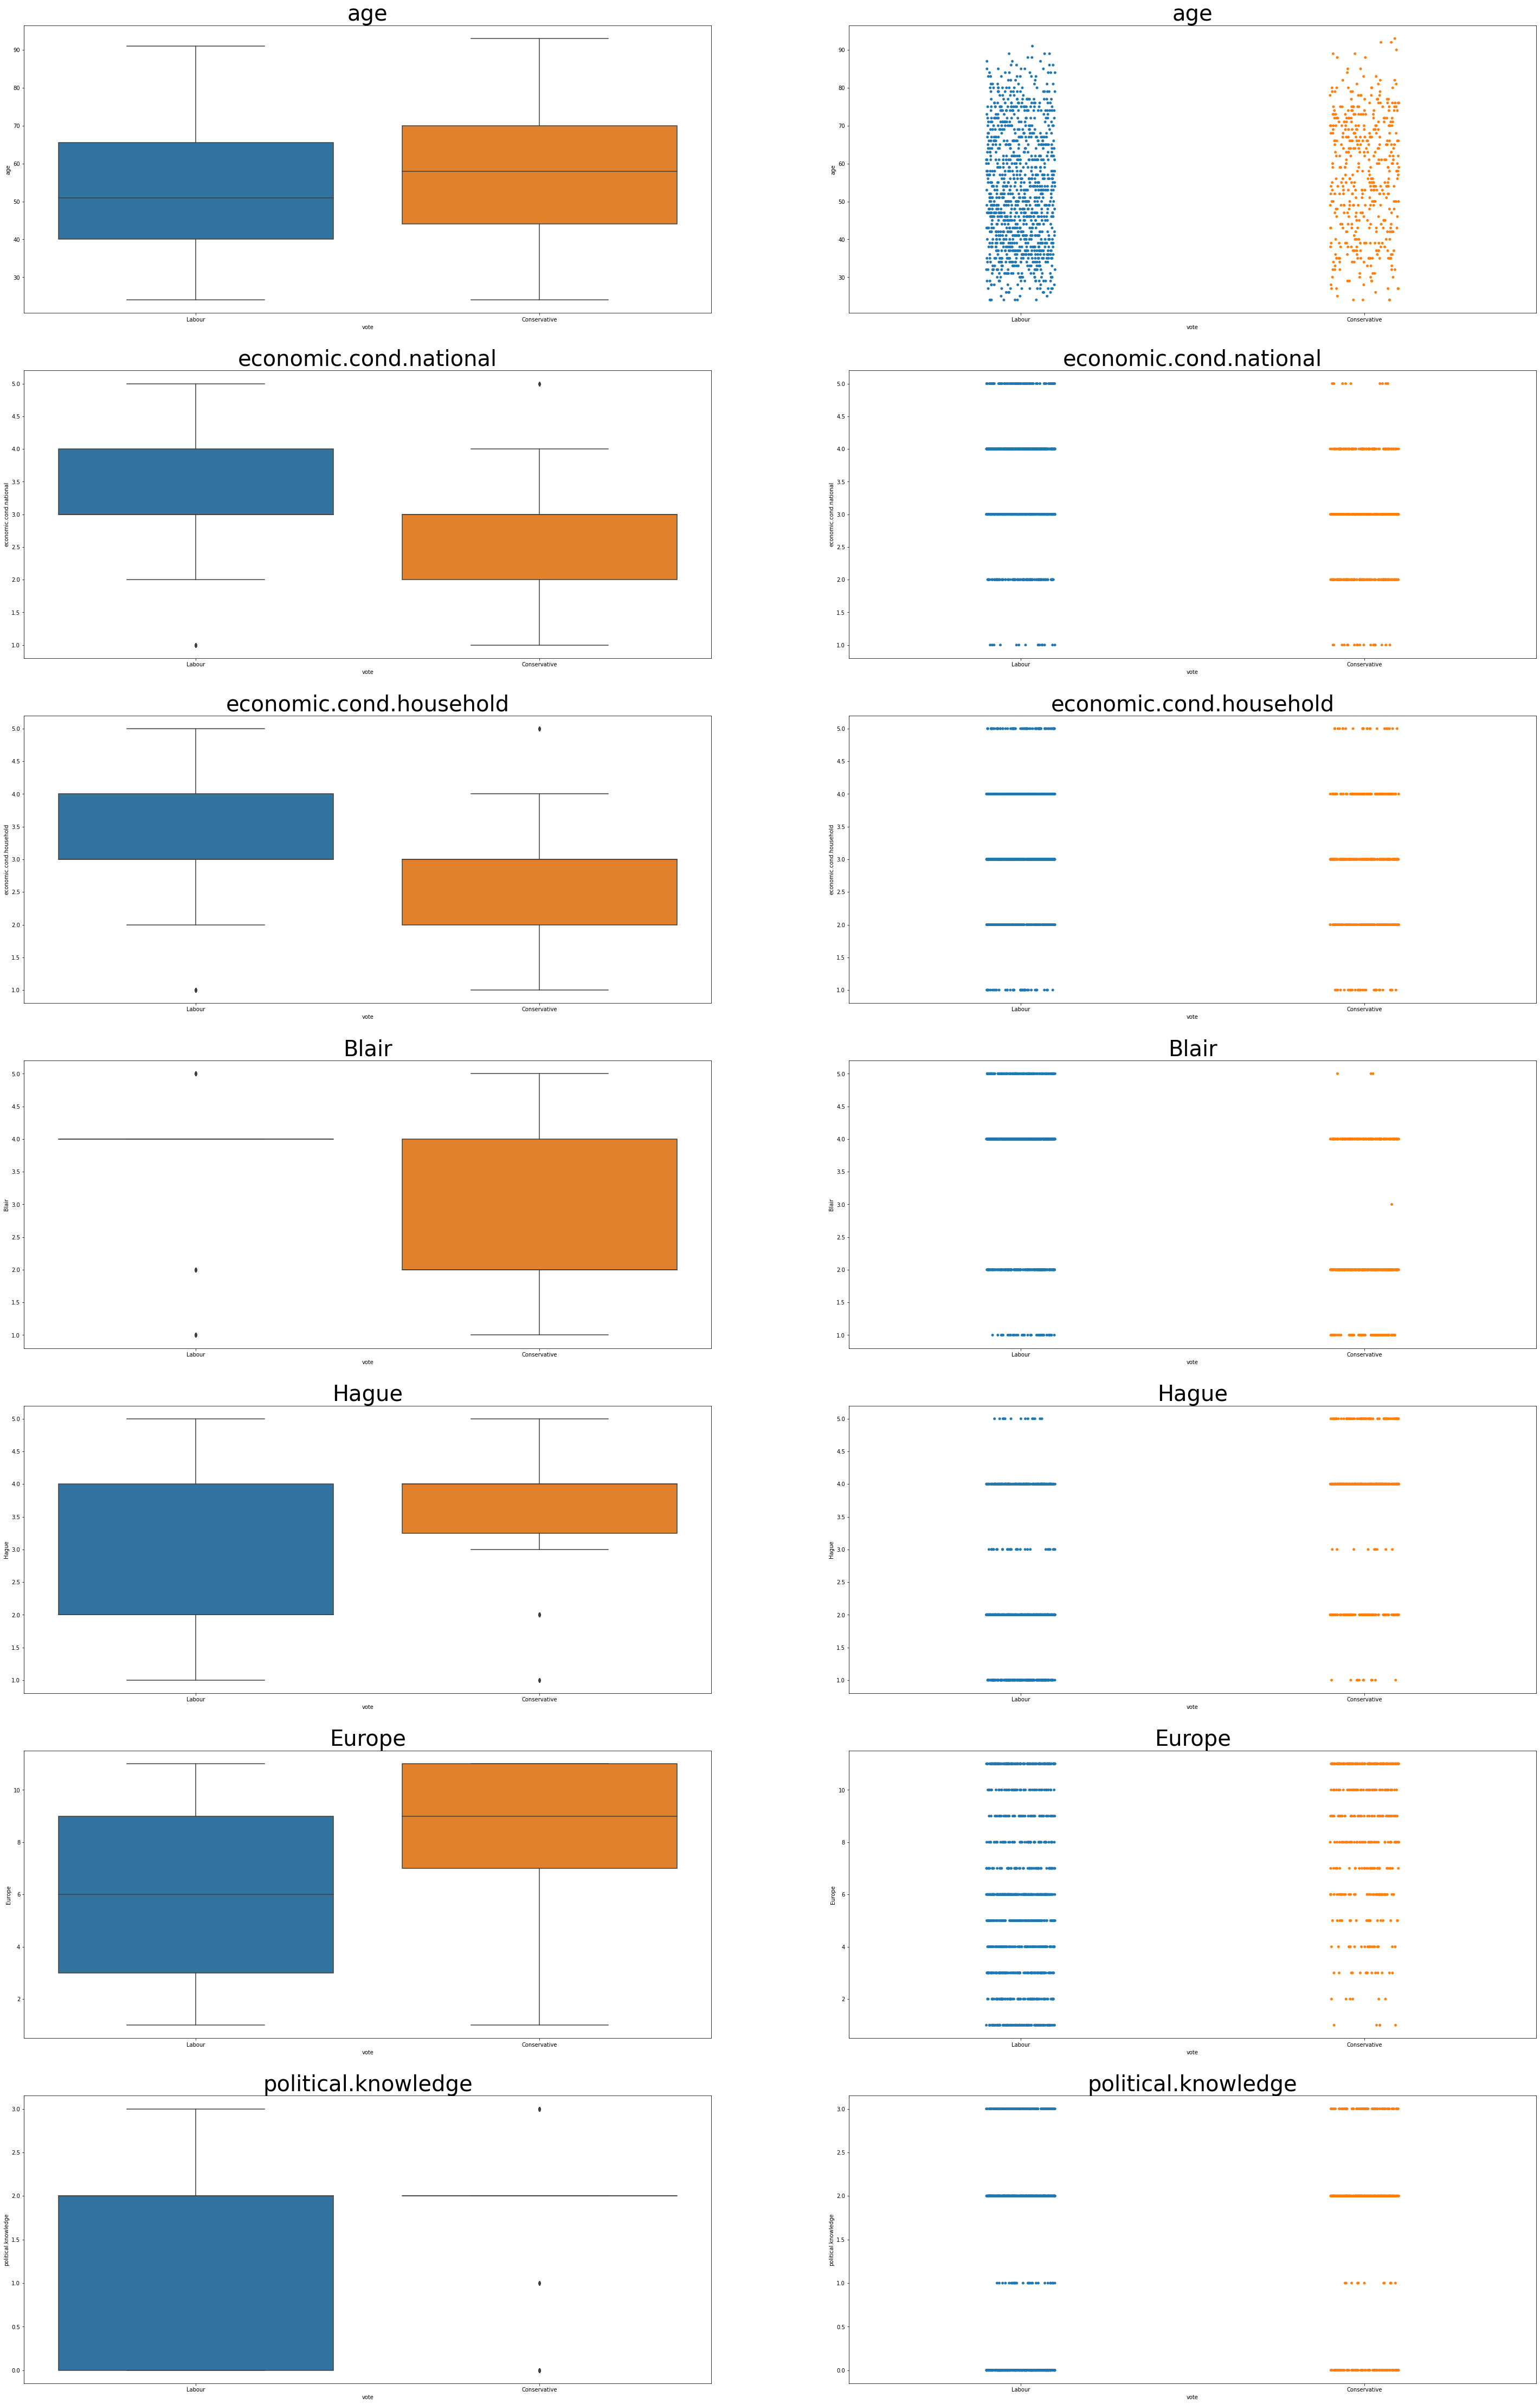

In [508]:
fig,axes = plt.subplots(7,2,figsize=(50,80))
for column,grid_num in zip(num,axes):
    a=sns.boxplot(edf["vote"],edf[column],ax=grid_num[0])
    a.set_title(column,fontsize=40)
    a=sns.stripplot(edf["vote"],edf[column],ax=grid_num[1])
    a.set_title(column,fontsize=40)

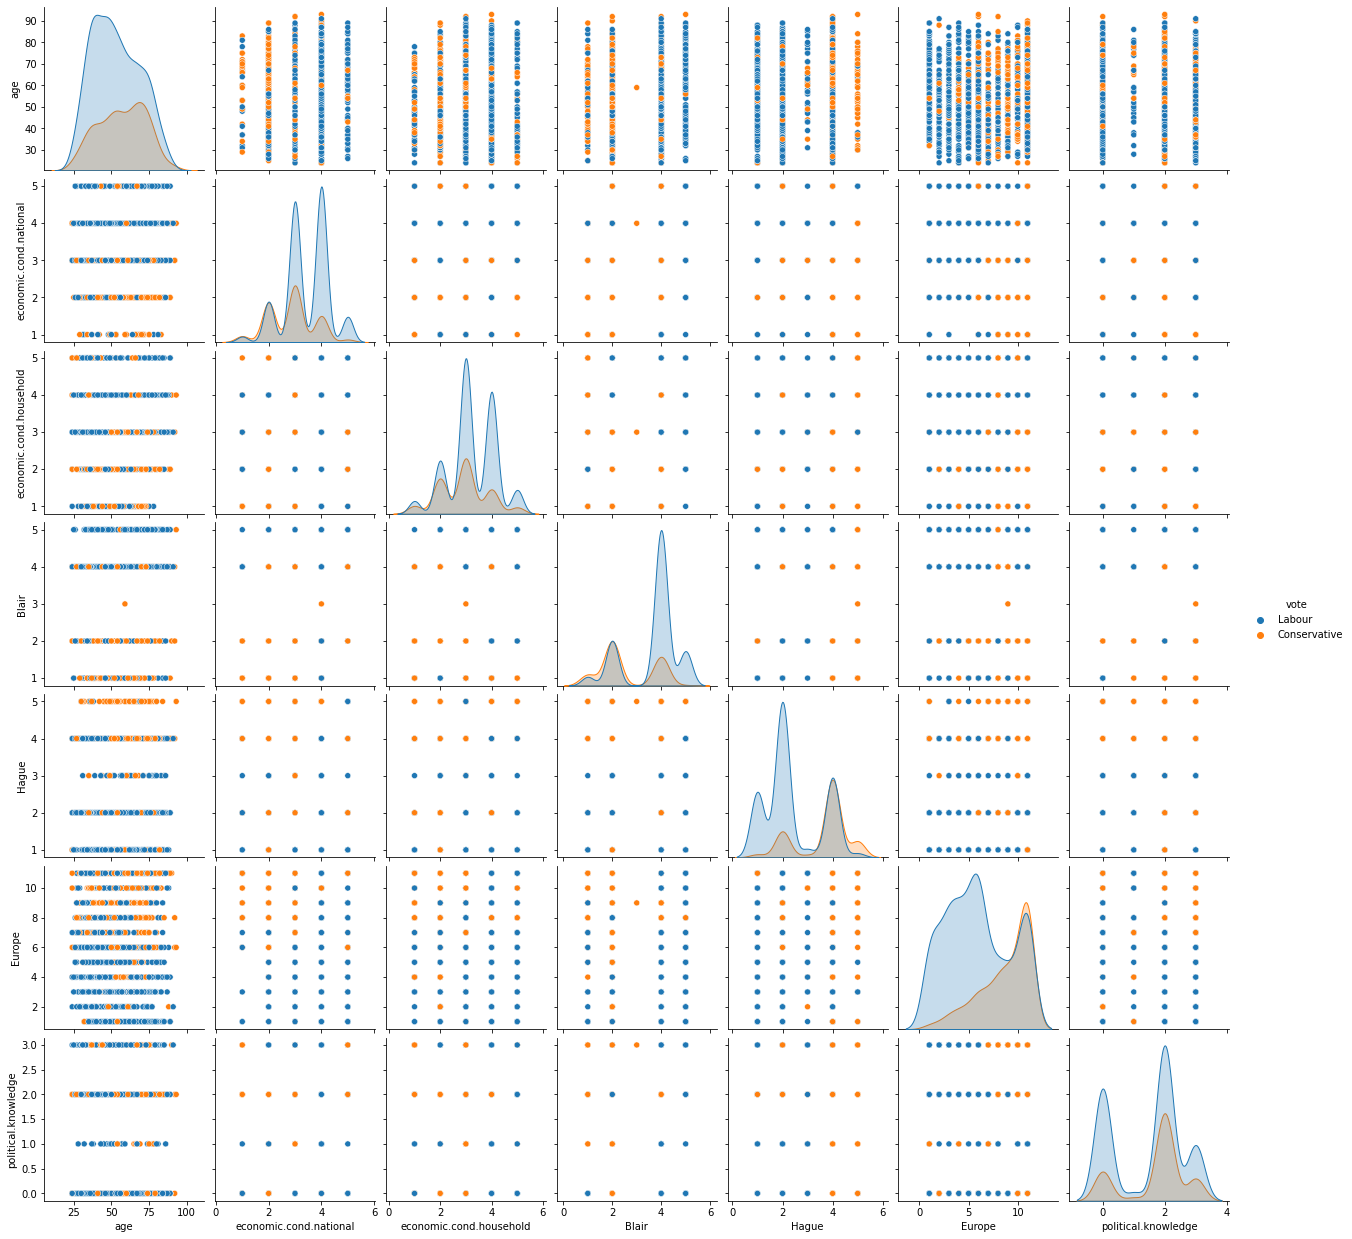

In [17]:
sns.pairplot(edf, hue = 'vote', diag_kind = 'kde');

In [18]:
edf.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


In [19]:
edf.cov()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,246.842075,0.256981,-0.607619,0.557762,0.669531,3.568550,-0.825301
economic.cond.national,0.256981,0.776107,0.283712,0.338314,-0.216589,-0.608397,-0.022546
economic.cond.household,-0.607619,0.283712,0.864810,0.235192,-0.116689,-0.352299,-0.038091
Blair,0.557762,0.338314,0.235192,1.380212,-0.351648,-1.147341,-0.026621
Hague,0.669531,-0.216589,-0.116689,-0.351648,1.514631,1.166149,-0.040469
Europe,3.568550,-0.608397,-0.352299,-1.147341,1.166149,10.873759,-0.544285
political.knowledge,-0.825301,-0.022546,-0.038091,-0.026621,-0.040469,-0.544285,1.173571


In [20]:
edf.var()

age                        246.842075
economic.cond.national       0.776107
economic.cond.household      0.864810
Blair                        1.380212
Hague                        1.514631
Europe                      10.873759
political.knowledge          1.173571
dtype: float64

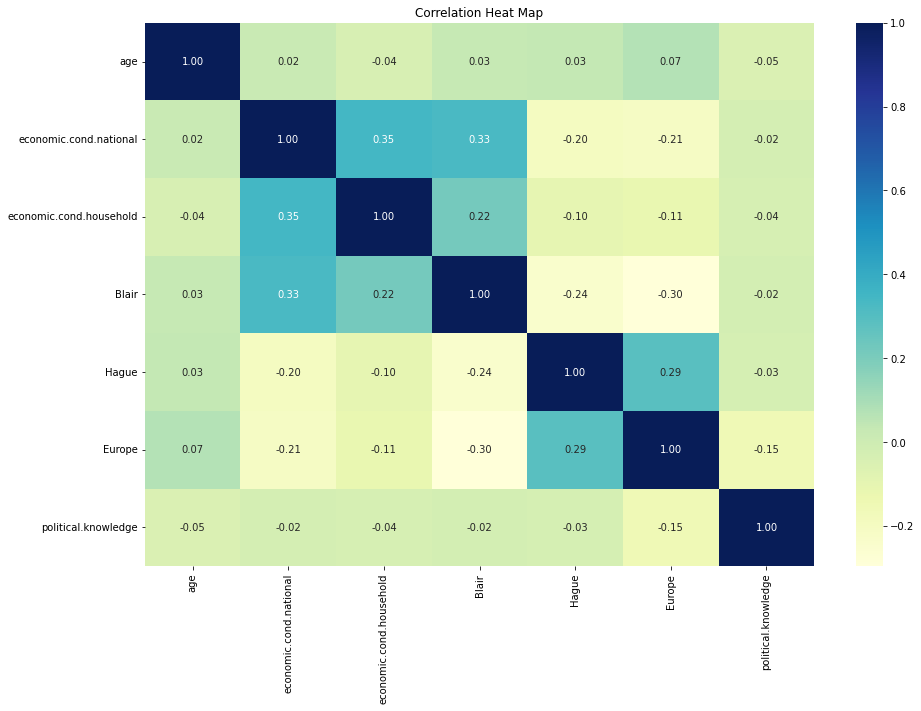

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(edf.corr(),annot=True, fmt = '.2f', cmap = 'YlGnBu')
plt.title('Correlation Heat Map');
plt.show()

_______________________________________________________________________________________________________________________________

### 1.3. Encode the data (having string values) for Modelling. Is Scaling necessary here or not?Data Split: Split the data into train and test (70:30) . The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

### Scaling Data

#### Encode the data

In [28]:
edf.select_dtypes(include='object').describe()

,vote,gender
count,1525,1525
unique,2,2
top,Labour,female
freq,1063,812


In [29]:
edf['gender'].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [30]:
edf['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [31]:
#replacing object to integer type
edf["gender"]=edf["gender"].replace({'female': 0 , 'male': 1})
edf["vote"]=edf["vote"].replace({'Labour': 0, 'Conservative': 1})

In [32]:
edf['gender'].value_counts()

0    812
1    713
Name: gender, dtype: int64

In [33]:
edf['vote'].value_counts()

0    1063
1     462
Name: vote, dtype: int64

In [34]:
edf.head(2)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,0
1,0,36,4,4,4,4,5,2,1


In [35]:
edf.tail(2)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1523,1,61,3,3,1,4,11,2,1
1524,1,74,2,3,2,4,11,0,0


In [36]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int64
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int64
dtypes: int64(9)
memory usage: 107.4 KB


#### Splitting Data 70:30

In [37]:
from sklearn.model_selection import train_test_split
# Copy all the predictor variables into x dataframe
x = edf.drop("vote",axis = 1)

# Copy target into the y dataframe.
y = edf.pop("vote")

In [38]:
#splitting dat into train and test - 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 1,test_size = 0.30 )

In [39]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1067, 8) (458, 8) (1067,) (458,)


In [40]:
x.shape

(1525, 8)

In [41]:
y.shape

(1525,)

In [42]:
from sklearn import metrics
y_train.value_counts(normalize=True)

0    0.688847
1    0.311153
Name: vote, dtype: float64

In [43]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1525 non-null   int64
 1   economic.cond.national   1525 non-null   int64
 2   economic.cond.household  1525 non-null   int64
 3   Blair                    1525 non-null   int64
 4   Hague                    1525 non-null   int64
 5   Europe                   1525 non-null   int64
 6   political.knowledge      1525 non-null   int64
 7   gender                   1525 non-null   int64
dtypes: int64(8)
memory usage: 95.4 KB


In [44]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scaled_train = scale.fit_transform(x_train)
scaled_test  = scale.transform(x_test)

In [45]:
scaled_test

array([[0.36231884, 0.        , 0.        , ..., 0.7       , 1.        ,
        0.        ],
       [0.14492754, 0.5       , 0.5       , ..., 0.8       , 0.66666667,
        1.        ],
       [0.39130435, 0.25      , 0.25      , ..., 0.3       , 0.66666667,
        1.        ],
       ...,
       [0.43478261, 0.5       , 0.25      , ..., 0.8       , 1.        ,
        1.        ],
       [0.33333333, 0.75      , 0.75      , ..., 0.3       , 1.        ,
        1.        ],
       [0.04347826, 0.5       , 0.75      , ..., 0.8       , 0.66666667,
        0.        ]])

_______________________________________________________________________________________________________________________________

### 1.4. Apply Logistic Regression and LDA (Linear Discriminant Analysis). Interpret the inferences of both models. Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

### Applying Logistic Regression Method

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(scaled_train,y_train)
y_train_predict = logreg.predict(scaled_train)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
## Performance Matrix on train data set
logreg_train_predict = logreg.predict(scaled_train)
logreg_train_recall = metrics.recall_score(y_train, logreg_train_predict)
print(logreg_train_recall)
print(metrics.confusion_matrix(y_train, logreg_train_predict))
print(metrics.classification_report(y_train, logreg_train_predict))

0.6807228915662651
[[668  67]
 [106 226]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       735
           1       0.77      0.68      0.72       332

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067



AxesSubplot(0.125,0.125;0.62x0.755)


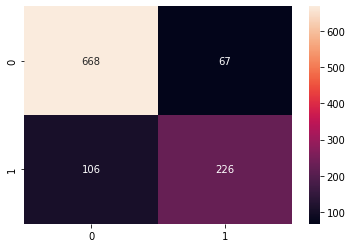

In [49]:
print(sns.heatmap(confusion_matrix(y_train,logreg_train_predict),annot=True , fmt="2g"));

AUC: 0.890


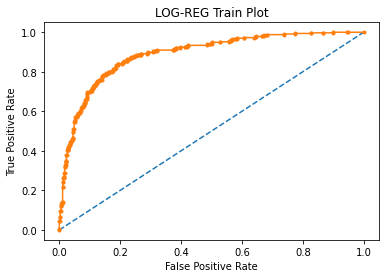

In [50]:
from sklearn.metrics import roc_auc_score,roc_curve
# AUC and ROC curve for training data set
probs = logreg.predict_proba(scaled_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('LOG-REG Train Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [51]:
## Performance Matrix on test data set
logreg_test_predict = logreg.predict(scaled_test)
logreg_test_recall = metrics.recall_score(y_test, logreg_test_predict)
print(logreg_test_recall)
print(metrics.confusion_matrix(y_test, logreg_test_predict))
print(metrics.classification_report(y_test, logreg_test_predict))

0.6461538461538462
[[292  36]
 [ 46  84]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       328
           1       0.70      0.65      0.67       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



AxesSubplot(0.125,0.125;0.62x0.755)


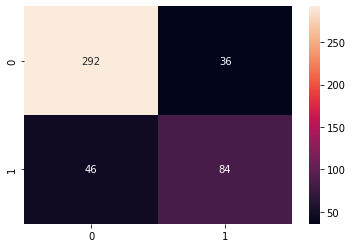

In [52]:
print(sns.heatmap(confusion_matrix(y_test,logreg_test_predict),annot=True , fmt="2g"))

AUC: 0.883


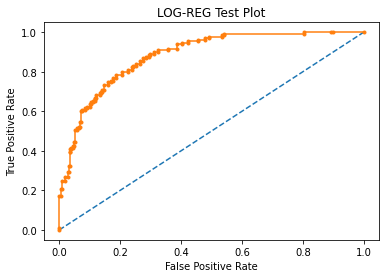

In [53]:
# AUC and ROC curve for test data set
probs = logreg.predict_proba(scaled_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('LOG-REG Test Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(logreg_train_predict, y_train))
print(mean_squared_error(logreg.predict(scaled_test), y_test))

0.16213683223992503
0.17903930131004367


In [55]:
logreg.score(x_train, y_train)

0.31115276476101217

In [138]:
## Create a dataframe with all recalls
data = {'Train Recall':logreg_train_recall,'Test Recall':logreg_test_recall}
recall_df = pd.DataFrame(data,index=['LogReg_Model'])
recall_df

,Train Recall,Test Recall
LogReg_Model,0.680723,0.646154


### Applying LDA

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA= LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [58]:
## Performance Matrix on train data set
LDA_train_predict = LDA.predict(x_train)
LDA_train_recall = metrics.recall_score(y_train, LDA_train_predict)
print(LDA_train_recall)
print(metrics.confusion_matrix(y_train, LDA_train_predict))
print(metrics.classification_report(y_train, LDA_train_predict))

0.7018072289156626
[[660  75]
 [ 99 233]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       735
           1       0.76      0.70      0.73       332

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



AUC: 0.889


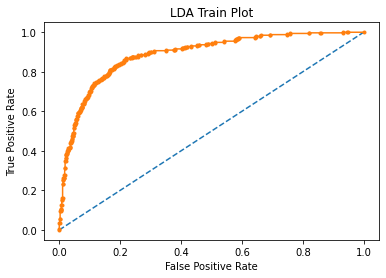

In [59]:
# AUC and ROC curve for training data set
probs = LDA.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('LDA Train Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [60]:
## Performance Matrix on test data set
LDA_test_predict = LDA.predict(x_test)
LDA_test_recall = metrics.recall_score(y_test, LDA_test_predict)
print(LDA_test_recall)
print(metrics.confusion_matrix(y_test, LDA_test_predict))
print(metrics.classification_report(y_test, LDA_test_predict))

0.6615384615384615
[[289  39]
 [ 44  86]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       328
           1       0.69      0.66      0.67       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.884


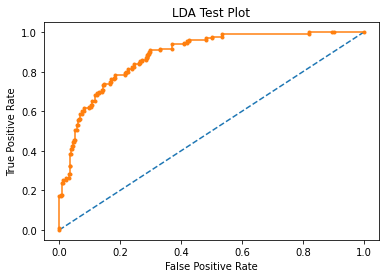

In [61]:
# AUC and ROC curve for test data set
probs = LDA.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('LDA Test Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [62]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(LDA_train_predict, y_train))
print(mean_squared_error(LDA.predict(x_test), y_test))

0.16307403936269915
0.1812227074235808


AxesSubplot(0.125,0.125;0.62x0.755)


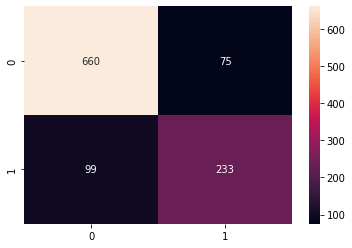

In [63]:
print(sns.heatmap(confusion_matrix(y_train,LDA_train_predict),annot=True , fmt="2g"));

AxesSubplot(0.125,0.125;0.62x0.755)


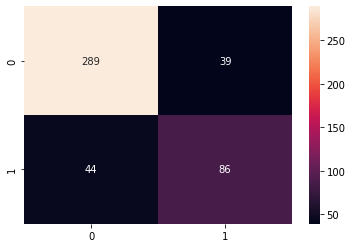

In [64]:
print(sns.heatmap(confusion_matrix(y_test,LDA_test_predict),annot=True , fmt="2g"));

In [139]:
## Create a dataframe with all recalls
data = {'Train Recall':LDA_train_recall,'Test Recall':LDA_test_recall}
recall_df = recall_df.append(pd.Series(data,name='LDA_Model'))
recall_df

,Train Recall,Test Recall
LogReg_Model,0.680723,0.646154
LDA_Model,0.701807,0.661538


_______________________________________________________________________________________________________________________________

### 1.5. Apply KNN Model and Naïve Bayes Model. Interpret the inferences of each model. Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

### Applying KNN Model

In [66]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [67]:
## Performance Matrix on train data set
KNN_train_predict = KNN.predict(x_train)
KNN_train_recall = metrics.recall_score(y_train, KNN_train_predict)
print(KNN_train_recall)
print(metrics.confusion_matrix(y_train, KNN_train_predict))
print(metrics.classification_report(y_train, KNN_train_predict))

0.7409638554216867
[[673  62]
 [ 86 246]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       735
           1       0.80      0.74      0.77       332

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.83      1067
weighted avg       0.86      0.86      0.86      1067



AUC: 0.924


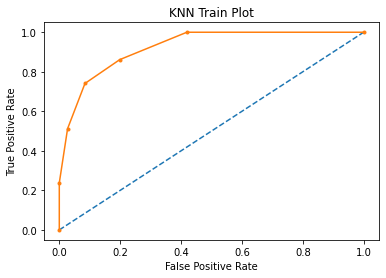

In [68]:
# AUC and ROC curve for training data set

probs = KNN.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('KNN Train Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [69]:
## Performance Matrix on test data set
KNN_test_predict = KNN.predict(x_test)
KNN_test_recall = metrics.recall_score(y_test, KNN_test_predict)
print(KNN_test_recall)
print(metrics.confusion_matrix(y_test, KNN_test_predict))
print(metrics.classification_report(y_test, KNN_test_predict))

0.6230769230769231
[[279  49]
 [ 49  81]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       328
           1       0.62      0.62      0.62       130

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



AUC: 0.832


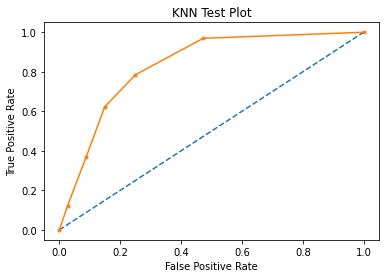

In [70]:
# AUC and ROC curve for test data set
probs = KNN.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('KNN Test Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [71]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(KNN_train_predict, y_train))
print(mean_squared_error(KNN.predict(x_test), y_test))

0.1387066541705717
0.21397379912663755


In [140]:
## Adding to dataframe with all recalls
data = {'Train Recall':KNN_train_recall,'Test Recall':KNN_test_recall}
recall_df = recall_df.append(pd.Series(data,name='KNN_Model'))
recall_df

,Train Recall,Test Recall
LogReg_Model,0.680723,0.646154
LDA_Model,0.701807,0.661538
KNN_Model,0.740964,0.623077


In [73]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(KNN_train_predict, y_train))
print(mean_squared_error(KNN.predict(x_test), y_test))

0.1387066541705717
0.21397379912663755


AxesSubplot(0.125,0.125;0.62x0.755)


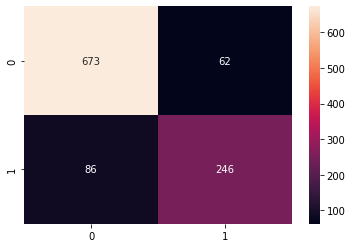

In [74]:
print(sns.heatmap(confusion_matrix(y_train,KNN_train_predict),annot=True , fmt="2g"));

AxesSubplot(0.125,0.125;0.62x0.755)


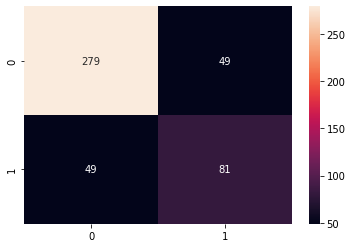

In [75]:
print(sns.heatmap(confusion_matrix(y_test,KNN_test_predict),annot=True , fmt="2g"));

### Applying  Naive Bayes Model

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [77]:
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [78]:
## Performance Matrix on train data set
NB_train_predict = NB.predict(x_train)
NB_train_recall = metrics.recall_score(y_train, NB_train_predict)
print(NB_train_recall)
print(metrics.confusion_matrix(y_train, NB_train_predict))
print(metrics.classification_report(y_train, NB_train_predict))

0.7228915662650602
[[649  86]
 [ 92 240]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       735
           1       0.74      0.72      0.73       332

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



AUC: 0.886


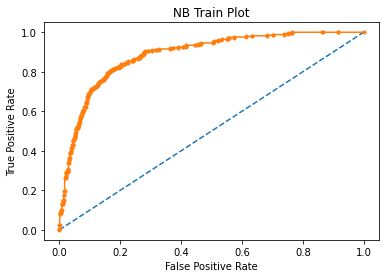

In [79]:
# AUC and ROC curve for training data set
probs = NB.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('NB Train Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [80]:
## Performance Matrix on test data set
NB_test_predict = NB.predict(x_test)
NB_test_recall = metrics.recall_score(y_test, NB_test_predict)
print(NB_test_recall)
print(metrics.confusion_matrix(y_test, NB_test_predict))
print(metrics.classification_report(y_test, NB_test_predict))

0.7230769230769231
[[284  44]
 [ 36  94]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       328
           1       0.68      0.72      0.70       130

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.885


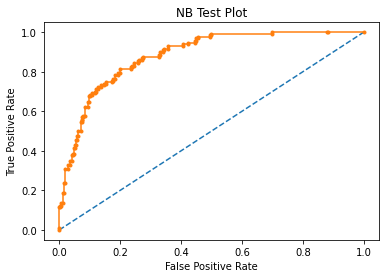

In [81]:
# AUC and ROC curve for test data set
probs = NB.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('NB Test Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [141]:
## Adding to dataframe with all recalls
data = {'Train Recall':NB_train_recall,'Test Recall':NB_test_recall}
recall_df = recall_df.append(pd.Series(data,name='NB_Model'))
recall_df

,Train Recall,Test Recall
LogReg_Model,0.680723,0.646154
LDA_Model,0.701807,0.661538
KNN_Model,0.740964,0.623077
NB_Model,0.722892,0.723077


In [83]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(NB_train_predict, y_train))
print(mean_squared_error(NB.predict(x_test), y_test))

0.1668228678537957
0.17467248908296942


AxesSubplot(0.125,0.125;0.62x0.755)


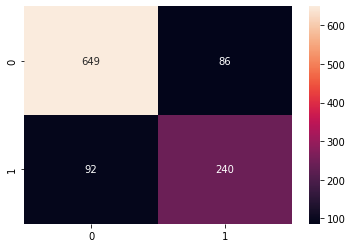

In [84]:
print(sns.heatmap(confusion_matrix(y_train,NB_train_predict),annot=True , fmt="2g"));

AxesSubplot(0.125,0.125;0.62x0.755)


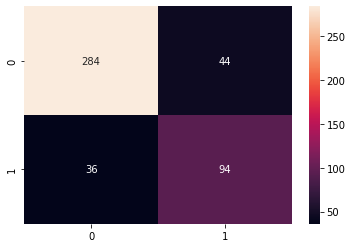

In [85]:
print(sns.heatmap(confusion_matrix(y_test,NB_test_predict),annot=True , fmt="2g"));

_______________________________________________________________________________________________________________________________

### 1.6. Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

### Using Random Forest and Applying Bagging

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV

RF=RandomForestClassifier(n_estimators=100,random_state=1)
RF.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [87]:
param_grid = {
    'max_depth':[5,10,15,20],
    'min_samples_leaf':[15,25,35,50],
    'min_samples_split' : [30,50,70,100],
}

In [88]:
grid_search = GridSearchCV(estimator=RF,param_grid=param_grid,cv=5)

In [89]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100]})

In [90]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=30,
                       random_state=1)

In [91]:
RF = grid_search.best_estimator_
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=30,
                       random_state=1)

In [92]:
## Performance Matrix on train data set
RF_train_predict = RF.predict(x_train)
RF_train_recall = metrics.recall_score(y_train, RF_train_predict)
print(RF_train_recall)
print(metrics.confusion_matrix(y_train, RF_train_predict))
print(metrics.classification_report(y_train, RF_train_predict))

0.6867469879518072
[[679  56]
 [104 228]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       735
           1       0.80      0.69      0.74       332

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067



AUC: 0.917


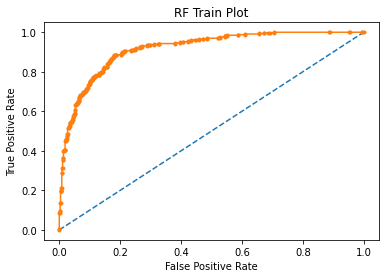

In [93]:
# AUC and ROC curve for training data set
probs = RF.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('RF Train Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [94]:
## Performance Matrix on test data set
RF_test_predict = RF.predict(x_test)
RF_test_recall = metrics.recall_score(y_test, RF_test_predict)
print(RF_test_recall)
print(metrics.confusion_matrix(y_test, RF_test_predict))
print(metrics.classification_report(y_test, RF_test_predict))

0.6538461538461539
[[294  34]
 [ 45  85]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       328
           1       0.71      0.65      0.68       130

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.78       458
weighted avg       0.82      0.83      0.83       458



AUC: 0.897


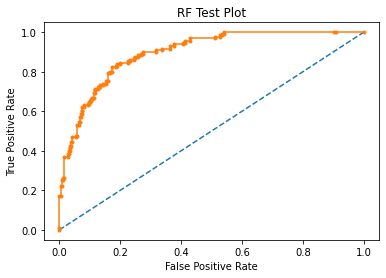

In [95]:
# AUC and ROC curve for test data set
probs = RF.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('RF Test Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [142]:
## Adding to dataframe with all recalls
data = {'Train Recall':RF_train_recall,'Test Recall':RF_test_recall}
recall_df = recall_df.append(pd.Series(data,name='RF_Model'))
recall_df

,Train Recall,Test Recall
LogReg_Model,0.680723,0.646154
LDA_Model,0.701807,0.661538
KNN_Model,0.740964,0.623077
NB_Model,0.722892,0.723077
RF_Model,0.686747,0.653846


AxesSubplot(0.125,0.125;0.62x0.755)


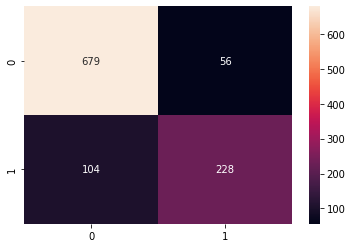

In [97]:
print(sns.heatmap(confusion_matrix(y_train,RF_train_predict),annot=True , fmt="2g"));

AxesSubplot(0.125,0.125;0.62x0.755)


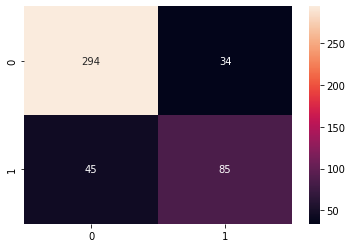

In [98]:
print(sns.heatmap(confusion_matrix(y_test,RF_test_predict),annot=True , fmt="2g"));

#### BAGGING

In [99]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
cart = RandomForestClassifier()
BG = BaggingClassifier(base_estimator= cart ,n_estimators=100,random_state=1)
BG.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [102]:
## Performance Matrix on train data set
BG_train_predict = BG.predict(x_train)
BG_train_recall = metrics.recall_score(y_train, BG_train_predict)
print(BG_train_recall)
print(metrics.confusion_matrix(y_train, BG_train_predict))
print(metrics.classification_report(y_train, BG_train_predict))

0.9156626506024096
[[726   9]
 [ 28 304]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       735
           1       0.97      0.92      0.94       332

    accuracy                           0.97      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.97      0.97      0.97      1067



AUC: 0.997


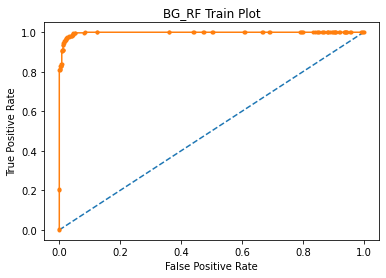

In [103]:
# AUC and ROC curve for training data set
probs = BG.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('BG_RF Train Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [146]:
## Performance Matrix on test data set
BG_test_predict = BG.predict(x_test)
BG_test_recall = metrics.recall_score(y_test, BG_test_predict)
print(BG_test_recall)
print(metrics.confusion_matrix(y_test, BG_test_predict))
print(metrics.classification_report(y_test, BG_test_predict))

0.7076923076923077
[[291  37]
 [ 38  92]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       328
           1       0.71      0.71      0.71       130

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



AUC: 0.897


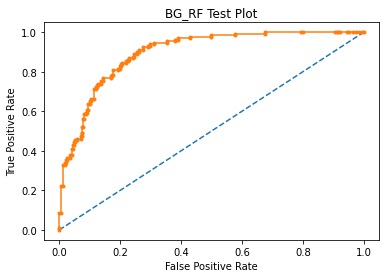

In [107]:
# AUC and ROC curve for test data set
probs = BG.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('BG_RF Test Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

AxesSubplot(0.125,0.125;0.62x0.755)


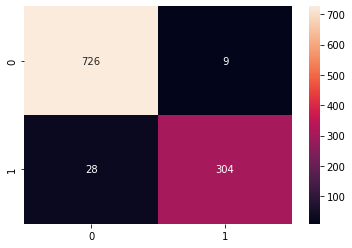

In [147]:
print(sns.heatmap(confusion_matrix(y_train,BG_train_predict),annot=True , fmt="2g"));

AxesSubplot(0.125,0.125;0.62x0.755)


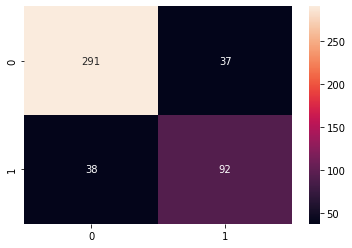

In [109]:
print(sns.heatmap(confusion_matrix(y_test,BG_test_predict),annot=True , fmt="2g"));

In [143]:
## Add to the existing dataframe
data = {'Train Recall':BG_train_recall,'Test Recall':BG_test_recall}
recall_df = recall_df.append(pd.Series(data,name='RF_Bag_Model'))
recall_df

,Train Recall,Test Recall
LogReg_Model,0.680723,0.646154
LDA_Model,0.701807,0.661538
KNN_Model,0.740964,0.623077
NB_Model,0.722892,0.723077
RF_Model,0.686747,0.653846
RF_Bag_Model,0.915663,0.707692


#### BOOSTING

#### ADA Boosting

In [112]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [117]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [118]:
grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [119]:
grid_search=GridSearchCV(estimator=ADB_model,param_grid=grid)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(n_estimators=100, random_state=1),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000]})

In [120]:
ADB_model=grid_search.best_estimator_
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=1000,
                   random_state=1)

In [121]:
## Performance Matrix on train data set
ADB_train_predict = ADB_model.predict(x_train)
ADB_train_recall = metrics.recall_score(y_train, ADB_train_predict)
print(ADB_train_recall)
print(metrics.confusion_matrix(y_train, ADB_train_predict))
print(metrics.classification_report(y_train, ADB_train_predict))

0.6536144578313253
[[674  61]
 [115 217]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       735
           1       0.78      0.65      0.71       332

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067



AUC: 0.913


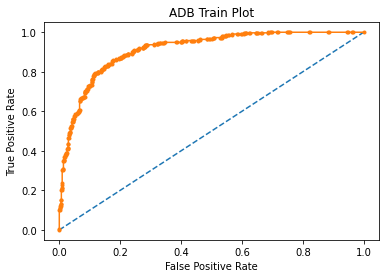

In [122]:
# AUC and ROC for the training data
probs = ADB.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ADB Train Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [123]:
## Performance Matrix on test data set
ADB_test_predict = ADB_model.predict(x_test)
ADB_test_recall = metrics.recall_score(y_test, ADB_test_predict)
print(ADB_test_recall)
print(metrics.confusion_matrix(y_test, ADB_test_predict))
print(metrics.classification_report(y_test, ADB_test_predict))

0.6538461538461539
[[296  32]
 [ 45  85]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       328
           1       0.73      0.65      0.69       130

    accuracy                           0.83       458
   macro avg       0.80      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.879


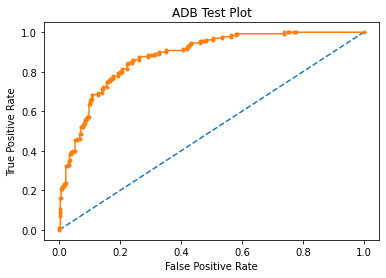

In [124]:
# AUC and ROC for the test data
probs = ADB.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ADB Test Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

AxesSubplot(0.125,0.125;0.62x0.755)


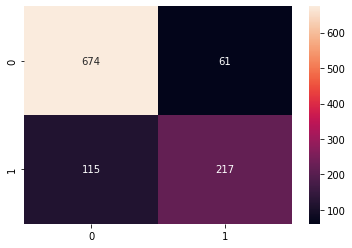

In [125]:
print(sns.heatmap(confusion_matrix(y_train,ADB_train_predict),annot=True , fmt="2g"));

AxesSubplot(0.125,0.125;0.62x0.755)


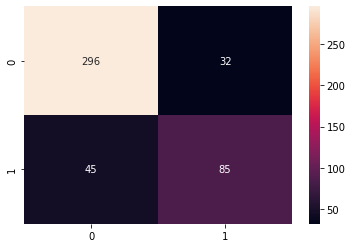

In [126]:
print(sns.heatmap(confusion_matrix(y_test,ADB_test_predict),annot=True , fmt="2g"));

In [144]:
## Add to the existing dataframe
data = {'Train Recall':ADB_train_recall,'Test Recall':ADB_test_recall}
recall_df = recall_df.append(pd.Series(data,name='ADB_Model'))
recall_df

,Train Recall,Test Recall
LogReg_Model,0.680723,0.646154
LDA_Model,0.701807,0.661538
KNN_Model,0.740964,0.623077
NB_Model,0.722892,0.723077
RF_Model,0.686747,0.653846
RF_Bag_Model,0.915663,0.707692
ADB_Model,0.653614,0.653846


### Gradient boosting

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=1)
GB = GB.fit(x_train, y_train)

In [130]:
## Performance Matrix on train data set
GB_train_predict = GB.predict(x_train)
GB_train_recall = metrics.recall_score(y_train, GB_train_predict)
print(GB_train_recall)
print(metrics.confusion_matrix(y_train, GB_train_predict))
print(metrics.classification_report(y_train, GB_train_predict))

0.7891566265060241
[[684  51]
 [ 70 262]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       735
           1       0.84      0.79      0.81       332

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



AUC: 0.950


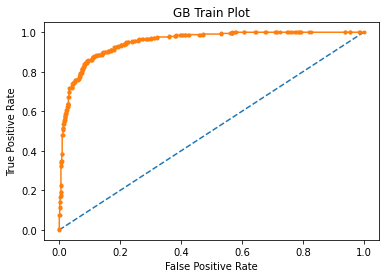

In [131]:
# AUC and ROC for the training data
probs = GB.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('GB Train Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [132]:
## Performance Matrix on test data set
GB_test_predict = GB.predict(x_test)
GB_test_recall = metrics.recall_score(y_test, GB_test_predict)
print(GB_test_recall)
print(metrics.confusion_matrix(y_test, GB_test_predict))
print(metrics.classification_report(y_test, GB_test_predict))

0.7384615384615385
[[285  43]
 [ 34  96]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       328
           1       0.69      0.74      0.71       130

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



AUC: 0.905


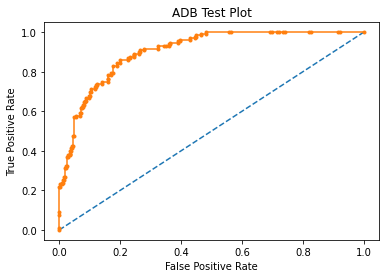

In [133]:
# AUC and ROC for the test data
probs = GB.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ADB Test Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

AxesSubplot(0.125,0.125;0.62x0.755)


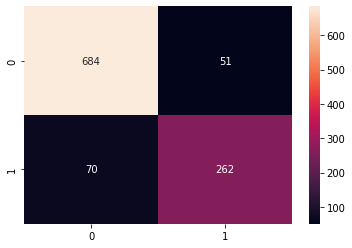

In [134]:
print(sns.heatmap(confusion_matrix(y_train,GB_train_predict),annot=True , fmt="2g"));

AxesSubplot(0.125,0.125;0.62x0.755)


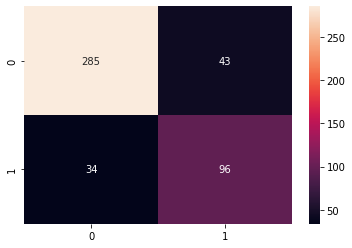

In [135]:
print(sns.heatmap(confusion_matrix(y_test,GB_test_predict),annot=True , fmt="2g"));

In [145]:
## Add to the existing dataframe
data = {'Train Recall':GB_train_recall,'Test Recall':GB_test_recall}
recall_df = recall_df.append(pd.Series(data,name='GB_Model'))
recall_df

,Train Recall,Test Recall
LogReg_Model,0.680723,0.646154
LDA_Model,0.701807,0.661538
KNN_Model,0.740964,0.623077
NB_Model,0.722892,0.723077
RF_Model,0.686747,0.653846
RF_Bag_Model,0.915663,0.707692
ADB_Model,0.653614,0.653846
GB_Model,0.789157,0.738462


_______________________________________________________________________________________________________________________________

# Problem 2:
## In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:
## 1.President Franklin D. Roosevelt in 1941
## 2.President John F. Kennedy in 1961
## 3.President Richard Nixon in 1973

### 2.1. Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

#### President Franklin D. Roosevelt in 1941

In [169]:
import nltk
import random
import string

nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
dfr = inaugural.raw('1941-Roosevelt.txt')
print(dfr)

On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.

In Washington's day the task of the people was to create and weld together a nation.

In Lincoln's day the task of the people was to preserve that Nation from disruption from within.

In this day the task of the people is to save that Nation and its institutions from disruption from without.

To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.

Lives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.

There are men who doubt this. There are men who believe that democracy, as a form 

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\harih\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [189]:
words = nltk.word_tokenize(dfr)
print("The number of words in President D.Roosevelt speech is", len(words))

The number of words in President D.Roosevelt speech is 1526


In [190]:
from nltk.tokenize import word_tokenize,sent_tokenize
sents = nltk.sent_tokenize(dfr)
print("The number of sentences in President D.Roosevelt speech is ", len(sents))

The number of sentences in President D.Roosevelt speech is  68


In [191]:
number_of_characters = len(dfr)

print('The number of characters in President D.Roosevelt speech is', number_of_characters)

The number of characters in President D.Roosevelt speech is 7571


In [108]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [208]:
## Create a dataframe with all recalls
data = {'Words_count':len(words),
        'Sent_count':len(sents),
       'Char_count': len(dfr),
       }
table_sdf = pd.DataFrame(data,index=['Preseident Roosevelt'])
table_sdf

,Words_count,Sent_count,Char_count
Preseident Roosevelt,1526,68,7571


#### President John F. Kennedy in 1961

In [187]:
import nltk
import random
import string

nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
dfk = inaugural.raw('1961-Kennedy.txt')
print(dfk)

Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.

The world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.

We dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\harih\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [193]:
words1 = nltk.word_tokenize(dfk)
print("The number of words in President John F. Kennedy speech is", len(words1))

The number of words in President John F. Kennedy speech is 1543


In [194]:
from nltk.tokenize import word_tokenize,sent_tokenize
sents1 = nltk.sent_tokenize(dfk)
print("The number of sentences in President John F. Kennedy speech is ", len(sents1))

The number of sentences in President John F. Kennedy speech is  52


In [195]:
number_of_characters = len(dfk)

print('The number of characters in President John F. Kennedy speech is', number_of_characters)

The number of characters in President John F. Kennedy speech is 7618


In [209]:
## Adding to dataframe
data = {'Words_count':len(words1),
        'Sent_count':len(sents1),
       'Char_count': len(dfk),
       }
table_sdf  = table_sdf.append(pd.Series(data,name='President Kennedy'))
table_sdf

,Words_count,Sent_count,Char_count
Preseident Roosevelt,1526,68,7571
President Kennedy,1543,52,7618


#### President Richard Nixon in 1973

In [197]:
import nltk
import random
import string

nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
dfn = inaugural.raw('1973-Nixon.txt')
print(dfn)

Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:

When we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.

As we meet here today, we stand on the threshold of a new era of peace in the world.

The central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.

Let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.

This past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional friendship

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\harih\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [198]:
words2 = nltk.word_tokenize(dfn)
print("The number of words in President Richard Nixon speech is", len(words2))

The number of words in President Richard Nixon speech is 2006


In [200]:
from nltk.tokenize import word_tokenize,sent_tokenize
sents2 = nltk.sent_tokenize(dfn)
print("The number of sentences in President Richard Nixon speech is ", len(sents2))

The number of sentences in President Richard Nixon speech is  68


In [202]:
number_of_characters = len(dfn)

print('The number of characters in President Richard Nixon speech is', number_of_characters)

The number of characters in President Richard Nixon speech is 9991


In [210]:
## Adding to dataframe
data = {'Words_count':len(words2),
        'Sent_count':len(sents2),
       'Char_count': len(dfn),
       }
table_sdf  = table_sdf.append(pd.Series(data,name='President Nixon'))
table_sdf

,Words_count,Sent_count,Char_count
Preseident Roosevelt,1526,68,7571
President Kennedy,1543,52,7618
President Nixon,2006,68,9991


In [219]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text = inaugural.raw('1973-Nixon.txt')
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(len(tokens_without_sw))

905
